In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, SGDClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [40]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Won6xkyYCcJLJ7eMpVt5VA_4P0tE1nb7

Downloading...
From: https://drive.google.com/uc?id=1Won6xkyYCcJLJ7eMpVt5VA_4P0tE1nb7
To: /content/data_banknote_authentication.txt
100% 46.4k/46.4k [00:00<00:00, 76.6MB/s]


In [41]:
df = pd.read_csv('/content/data_banknote_authentication.txt')
df

,x1,x2,x3,x4,y
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [42]:
shuffled_data = shuffle(df)
shuffled_data.to_csv('created_data.csv', index=False)
print(shuffled_data)

          x1       x2        x3        x4  y
782  -0.3481 -0.38696  -0.47841  0.626270  1
364   5.7823  5.57880  -2.40890 -0.056479  0
262   1.8114  7.60670  -0.97880 -2.466800  0
139  -0.2062  9.22070  -3.70440 -6.810300  0
1033  1.5077  1.95960  -3.05840 -0.122430  1
...      ...      ...       ...       ... ..
861  -2.3797 -1.44020   1.12730  0.160760  1
199   5.8862  5.87470  -2.81670 -0.300870  0
428   3.4246 -0.14693   0.80342  0.291360  0
1235 -3.5359  0.30417   0.65690 -0.295700  1
949  -3.1158 -8.62890  10.44030  0.971530  1

[1372 rows x 5 columns]


In [43]:
df1 = pd.read_csv('/content/created_data.csv')
df1

,x1,x2,x3,x4,y
0,-0.3481,-0.38696,-0.47841,0.626270,1
1,5.7823,5.57880,-2.40890,-0.056479,0
2,1.8114,7.60670,-0.97880,-2.466800,0
3,-0.2062,9.22070,-3.70440,-6.810300,0
4,1.5077,1.95960,-3.05840,-0.122430,1
...,...,...,...,...,...
1367,-2.3797,-1.44020,1.12730,0.160760,1
1368,5.8862,5.87470,-2.81670,-0.300870,0
1369,3.4246,-0.14693,0.80342,0.291360,0
1370,-3.5359,0.30417,0.65690,-0.295700,1


Logistic Regression (from Scratch)

In [44]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [45]:
def logistic_regression(x, w):
    y_hat = sigmoid(x @ w)
    return y_hat

Binary Cross Entropy (BCE)

In [46]:
def bce(y, y_hat):
    loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    return loss

Gradient

In [47]:
def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads

Gradient Descent

In [48]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

Accuracy

In [49]:
def accuracy(y, y_hat):
    acc = np.sum(y == np.round(y_hat)) / len(y)
    return acc

train آموزش داده های نرمالایز شده

In [50]:
X = df1[['x1','x2','x3','x4']].values
y = df1[['y']].values
X, y

(array([[-0.3481  , -0.38696 , -0.47841 ,  0.62627 ],
        [ 5.7823  ,  5.5788  , -2.4089  , -0.056479],
        [ 1.8114  ,  7.6067  , -0.9788  , -2.4668  ],
        ...,
        [ 3.4246  , -0.14693 ,  0.80342 ,  0.29136 ],
        [-3.5359  ,  0.30417 ,  0.6569  , -0.2957  ],
        [-3.1158  , -8.6289  , 10.4403  ,  0.97153 ]]),
 array([[1],
        [0],
        [0],
        ...,
        [0],
        [1],
        [1]]))

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1097, 4), (275, 4), (1097, 1), (275, 1))

In [52]:
# Create separate StandardScaler instances for each feature
scaler_x1 = StandardScaler()
scaler_x2 = StandardScaler()
scaler_x3 = StandardScaler()
scaler_x4 = StandardScaler()

# Fit and transform each feature separately
x_train_normalized_x1 = scaler_x1.fit_transform(x_train[:, [0]])
x_train_normalized_x2 = scaler_x2.fit_transform(x_train[:, [1]])
x_train_normalized_x3 = scaler_x3.fit_transform(x_train[:, [2]])
x_train_normalized_x4 = scaler_x4.fit_transform(x_train[:, [3]])

# Transform the corresponding test data using the same scalers
x_test_normalized_x1 = scaler_x1.fit_transform(x_test[:, [0]])
x_test_normalized_x2 = scaler_x1.fit_transform(x_test[:, [1]])
x_test_normalized_x3 = scaler_x1.fit_transform(x_test[:, [2]])
x_test_normalized_x4 = scaler_x1.fit_transform(x_test[:, [3]])

# Concatenate the normalized features back into a 2D array
x_train_normalized = np.hstack((x_train_normalized_x1,x_train_normalized_x2,x_train_normalized_x3,x_train_normalized_x4))
x_test_normalized = np.hstack((x_test_normalized_x1,x_test_normalized_x2,x_test_normalized_x3,x_test_normalized_x4))

# Check the shapes of the normalized data
x_train_normalized.shape, x_test_normalized.shape, y_train.shape, y_test.shape

((1097, 4), (275, 4), (1097, 1), (275, 1))

In [53]:
y_hat = logistic_regression(x_train_normalized, np.random.randn(4, 1))
print(y_hat.shape)

(1097, 1)


In [54]:
x_train_normalized = np.hstack((np.ones((len(x_train_normalized), 1)), x_train_normalized))
x_train_normalized.shape

(1097, 5)

In [55]:
m = 4
w = np.random.randn(m+1, 1)
print(w.shape)

(5, 1)


In [56]:
eta = 0.01
n_epochs = 100000 #N

In [57]:
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = logistic_regression(x_train_normalized, w)

    # loss
    e = bce(y_train, y_hat)
    error_hist.append(e)

    # gradients
    grads = gradient(x_train_normalized, y_train, y_hat)

    # gradient descent
    w = gradient_descent(w, eta, grads)

    if (epoch+1) %  1== 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

Streaming output truncated to the last 5000 lines.
Epoch=95000, 	 E=0.03593,	 w=[-2.27297867 -6.23239386 -6.20125246 -5.69837559  0.150462  ]
Epoch=95001, 	 E=0.03593,	 w=[-2.2729887  -6.23240977 -6.20127185 -5.69839277  0.1504607 ]
Epoch=95002, 	 E=0.03593,	 w=[-2.27299873 -6.23242567 -6.20129124 -5.69840994  0.15045941]
Epoch=95003, 	 E=0.03593,	 w=[-2.27300876 -6.23244158 -6.20131063 -5.69842711  0.15045811]
Epoch=95004, 	 E=0.03593,	 w=[-2.27301879 -6.23245749 -6.20133003 -5.69844428  0.15045681]
Epoch=95005, 	 E=0.03593,	 w=[-2.27302882 -6.2324734  -6.20134942 -5.69846145  0.15045551]
Epoch=95006, 	 E=0.03593,	 w=[-2.27303885 -6.2324893  -6.20136881 -5.69847862  0.15045421]
Epoch=95007, 	 E=0.03593,	 w=[-2.27304889 -6.23250521 -6.2013882  -5.69849579  0.15045291]
Epoch=95008, 	 E=0.03593,	 w=[-2.27305892 -6.23252112 -6.20140759 -5.69851296  0.15045162]
Epoch=95009, 	 E=0.03593,	 w=[-2.27306895 -6.23253702 -6.20142698 -5.69853014  0.15045032]
Epoch=95010, 	 E=0.03593,	 w=[-2.273078

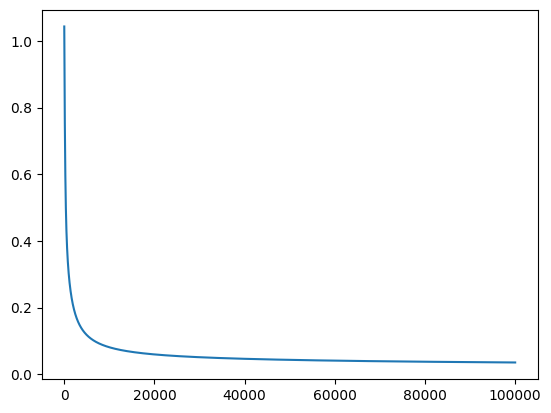

In [58]:
plt.plot(error_hist)

In [59]:
y_hat = logistic_regression(x_train_normalized, w)
accuracy(y_train, y_hat)

0.98359161349134

In [60]:
x_test_normalized = np.hstack((np.ones((len(x_test_normalized), 1)), x_test_normalized))
y_hat = logistic_regression(x_test_normalized, w)
accuracy(y_test, y_hat)

0.9781818181818182

In [61]:
x_nemune_normalized=x_test_normalized[[154,101,54,57,30]]
y_hat = logistic_regression(x_nemune_normalized, w)
y_test1=y_test[[154,101,54,57,30]]
y_hat,y_test1

(array([[2.65402606e-05],
        [9.96407629e-01],
        [2.77419457e-05],
        [6.20260894e-06],
        [9.88040653e-01]]),
 array([[0],
        [1],
        [0],
        [0],
        [1]]))